#Muhammad Luthfan Lazuardi - 24060122120010



*   Nama : Muhammad Luthfan Lazuardi
*   NIM : 24060122120010
*   Lab : C1
*   Tanggal : 24 November 2024





#I. Melakukan Clustering Menggunakan Sample Dataset

#A. Import Dataset

In [128]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


Penjelasan :


---

Di atas berfungsi mengimpor pustaka untuk analisis data dan visualisasi. %matplotlib inline membuat grafik tampil langsung. deepcopy digunakan untuk membuat salinan data yang terpisah, sementara numpy dan pandas digunakan untuk manipulasi data. Untuk membuat grafik, digunakan pyplot dari matplotlib. Ukuran grafik disetting menjadi 16x9 inci, dan gaya tampilannya menggunakan tema ggplot.

---


In [129]:
# Import dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pd.read_csv(url, names=names)

# fitur ke 2 (sepal-width) dan 3 (petal-length)
fitur = data[['sepal-width', 'petal-length']]

# Print informasi dataset
print(fitur.shape)  # Menampilkan ukuran dataset (jumlah baris dan kolom)
print(fitur.head(20))  # Menampilkan 20 baris pertama data

(150, 2)
    sepal-width  petal-length
0           3.5           1.4
1           3.0           1.4
2           3.2           1.3
3           3.1           1.5
4           3.6           1.4
5           3.9           1.7
6           3.4           1.4
7           3.4           1.5
8           2.9           1.4
9           3.1           1.5
10          3.7           1.5
11          3.4           1.6
12          3.0           1.4
13          3.0           1.1
14          4.0           1.2
15          4.4           1.5
16          3.9           1.3
17          3.5           1.4
18          3.8           1.7
19          3.8           1.5


Penjelasan :


---

Di atas untuk mengimpor dataset Iris dari URL lalu memberikan nama untuk kolom-kolomnya. Kemudian, dua fitur yang dipilih, yaitu sepal-width dan petal-length, disimpan dalam variabel fitur. Selanjutnya, menampilkan ukuran dataset dengan fitur.shape yang menunjukkan jumlah baris dan kolom, serta menampilkan 20 baris pertama dari data menggunakan fitur.head(20) untuk memberikan gambaran awal tentang data yang dipilih.

---


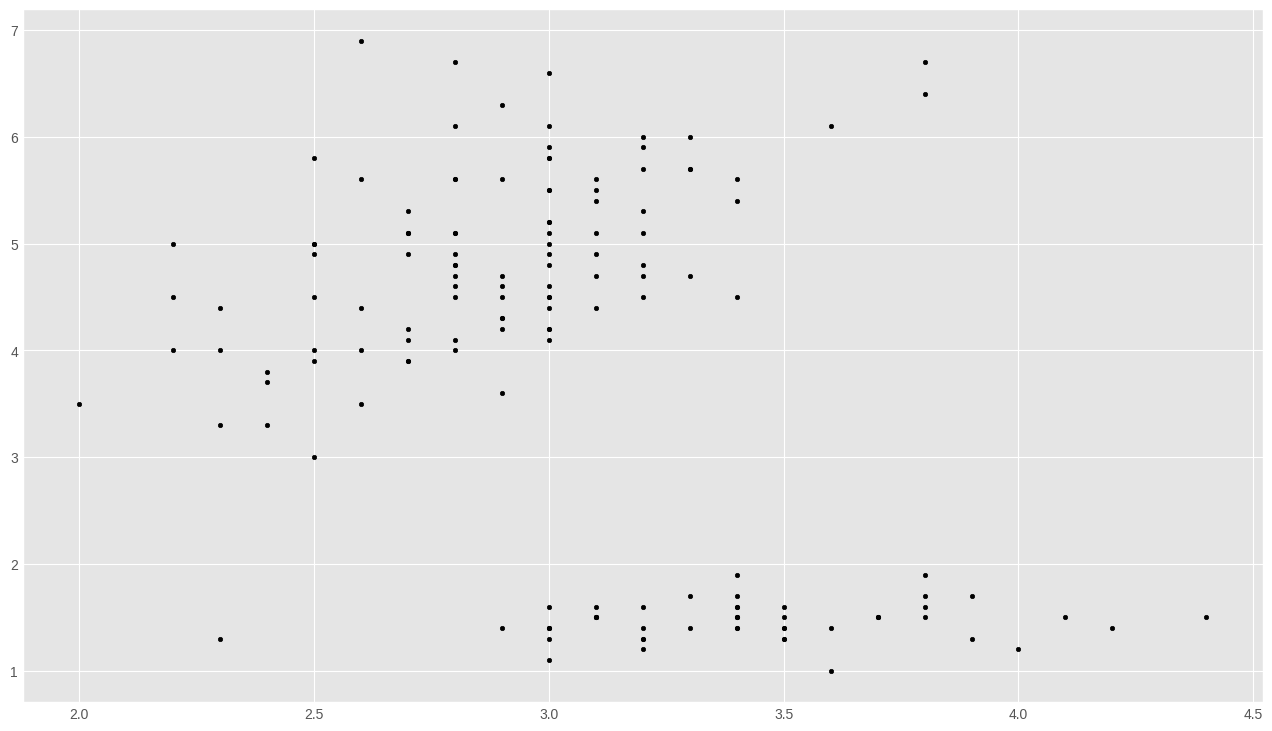

In [130]:
# Plot dataset
f1 = data['sepal-width'].values
f2 = data['petal-length'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=10)

Penjelasan :


---

Kode di atas digunakan untuk membuat visualisasi grafik scatter plot dari dua fitur dalam dataset Iris. Pertama, kolom sepal-width dan petal-length diambil dari dataset dan disimpan dalam variabel f1 dan f2. Selanjutnya, kedua fitur tersebut digabungkan menjadi 1 array 2D menggunakan np.array(list(zip(f1, f2))), yang disimpan dalam variabel X. Setelah itu, plt.scatter() digunakan untuk membuat scatter plot, dengan f1 sebagai sumbu X dan f2 sebagai sumbu Y. Titik-titik dalam plot diberi warna hitam (c='black') dan ukuran titik ditentukan sebesar 10 (s=10).

---


#B. Melakukan clustering

In [131]:
from sklearn.cluster import KMeans
# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=3)
# Fitting input data
kmeans = kmeans.fit(X)
# Mendapatkan cluster labels
labels = kmeans.predict(X)
# Mendapatkan nilai centroid
C = kmeans.cluster_centers_
# Mencetak nilai centroid
print(C)

[[2.75087719 4.32807018]
 [3.418      1.464     ]
 [3.03255814 5.67209302]]


Penjelasan :


---

Kode di atas menggunakan algoritma KMeans untuk melakukan klustering. Pertama, KMeans(n_clusters=3) digunakan untuk menentukan bahwa data akan dikelompokkan ke dalam 3 kluster. Kemudian, metode fit() digunakan untuk melatih model KMeans dengan data input X. Setelah model dilatih, predict() digunakan untuk mendapatkan label kluster untuk setiap titik data. Selanjutnya, nilai centroid (pusat) untuk setiap kluster diperoleh menggunakan cluster_centers_, yang merupakan titik tengah dari kluster. Selanjutnya dicetak nilai centroid untuk ketiga kluster, dengan setiap nilai mewakili koordinat rata-rata untuk sepal-width dan petal-length di masing-masing kluster.

---


#C. Plot Hasil Clustering

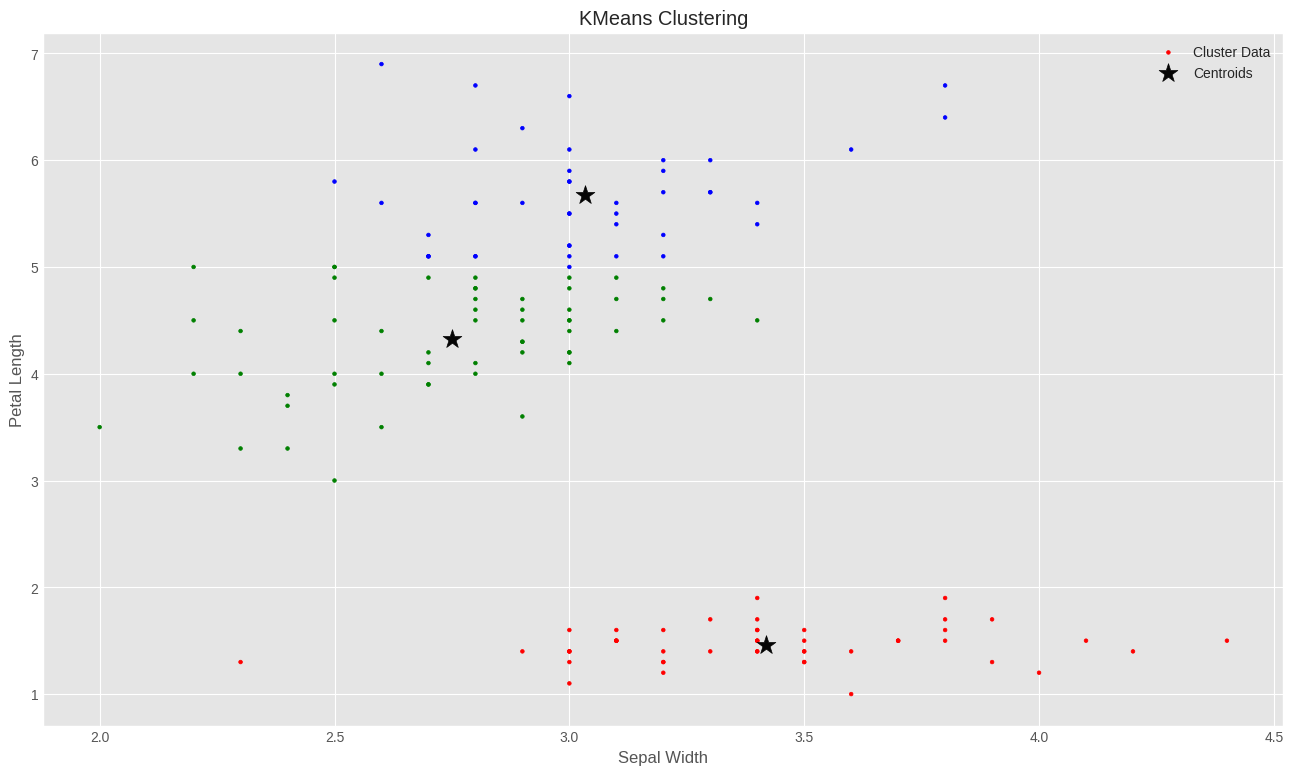

In [132]:
colors =['green', 'red', 'blue']
#plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=7, c=[colors[label] for label in labels], label="Cluster Data")
plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505', label="Centroids")

# Tambahkan label dan judul
plt.title("KMeans Clustering")
plt.xlabel("Sepal Width")
plt.ylabel("Petal Length")
plt.legend()
plt.show()

Penjelasan :


---

Kode di atas untuk memvisualisasikan hasil klustering KMeans dengan menampilkan data yang dikelompokkan dalam 3 warna berbeda dan centroid yang digambarkan sebagai bintang berwarna  hitam. Grafik saya beri judul dan label sumbu, serta saya lengkapi dengan legenda untuk membedakan data kluster dan centroid, kemudian ditampilkan menggunakan plt.show().

---


#II. Menghitung Inertia (SSE) dan Silhouette Coefficient

In [133]:
from sklearn.metrics import silhouette_score

# Menghitung Inertia (SSE)
inertia = kmeans.inertia_
print(f"Inertia (SSE): {inertia}")

# Menghitung Silhouette Coefficient
sil_score = silhouette_score(X, labels)
print(f"Silhouette Coefficient: {sil_score}")

Inertia (SSE): 40.80747409220729
Silhouette Coefficient: 0.5930654335408364


Penjelasan :


---

  Pertama, kmeans.inertia_ digunakan untuk menghitung Inertia (SSE), yang mengukur total jarak kuadrat antara titik data dan centroid kluster. Kedua, silhouette_score(X, labels) digunakan untuk menghitung Silhouette Coefficient, yang mengukur seberapa baik titik data berada di dalam klusternya dibandingkan dengan kluster lainnya. Inertia memberi gambaran kualitas pemisahan kluster, sementara Silhouette Coefficient mengukur sejauh mana data terkelompok dengan baik. Kemudian saat di-run didapatkan Inertia (SSE) dengan nilai 40.81 dan Silhouette Coefficient dengan nilai sebesar 0.59.

---


#III. Menentukan Jumlah K dengan Elbow Method

#A. Import Library



In [134]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np
from sklearn.cluster import KMeans

Penjelasan :


---

Kode di atas mengimpor pustaka untuk visualisasi dan klustering data. %matplotlib inline digunakan untuk menampilkan grafik langsung, pyplot digunakan untuk membuat grafik dengan style seaborn-v0_8-whitegrid. numpy untuk manipulasi array, dan KMeans untuk klustering.

---


#B. Import Dataset

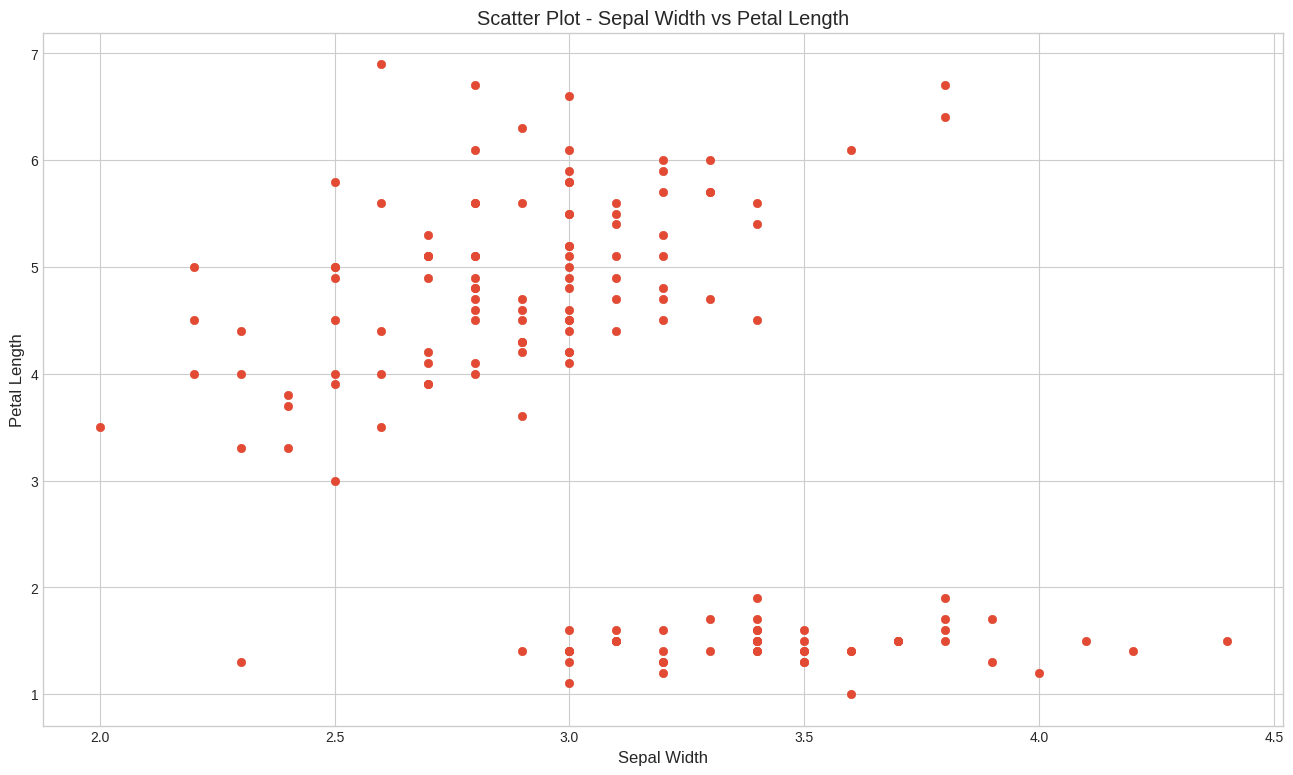

In [135]:
# memuat data set
from sklearn.datasets import load_iris
iris = load_iris()
features=iris.data.T
plt.plot()
plt.scatter(features[1], features[2])  # features[1] adalah sepal-width, features[2] adalah petal-length
plt.xlabel("Sepal Width")
plt.ylabel("Petal Length")
plt.title("Scatter Plot - Sepal Width vs Petal Length")
plt.show()

Penjelasan :


---

Kode di atas memuat dataset Iris menggunakan load_iris() dari sklearn.datasets dan menyimpan data fitur dalam variabel features. Data fitur tersebut ditransposisikan dengan .T sehingga baris mewakili fitur dan kolom mewakili sampel. Kemudian, plt.scatter() digunakan untuk membuat plot sebar dengan sumbu X adalah sepal-width (features[1]) dan sumbu Y adalah petal-length (features[2]). Grafik saya beri label untuk sumbu X dan Y. Selanjutnya, plt.show() untuk menampilkan grafik tersebut.

---


#C. Menentukan Nilai yang Tepat untuk Cluster

In [147]:
X = np.array(list(zip(features[1], features[2]))).reshape(len(features[1]), 2)
SSE = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    SSE.append(kmeanModel.inertia_)

Penjelasan :


---

Kode di atas digunakan untuk menghitung nilai Inertia (SSE) dengan berbagai jumlah kluster (K) pada dataset Iris. Pertama, fitur sepal-width dan petal-length digabungkan menjadi satu array 2D, yang kemudian digunakan sebagai data input. Selanjutnya, untuk setiap nilai K antara 1 hingga 9, model KMeans dibuat dengan n_clusters=k, dilatih dengan data X, dan hasil Inertia (SSE) disimpan dalam list SSE. Inertia ini mengukur seberapa baik data terkelompok dalam kluster, dengan nilai yang lebih rendah menunjukkan pembagian kluster yang lebih baik.

---


#D. Plot Nilai K

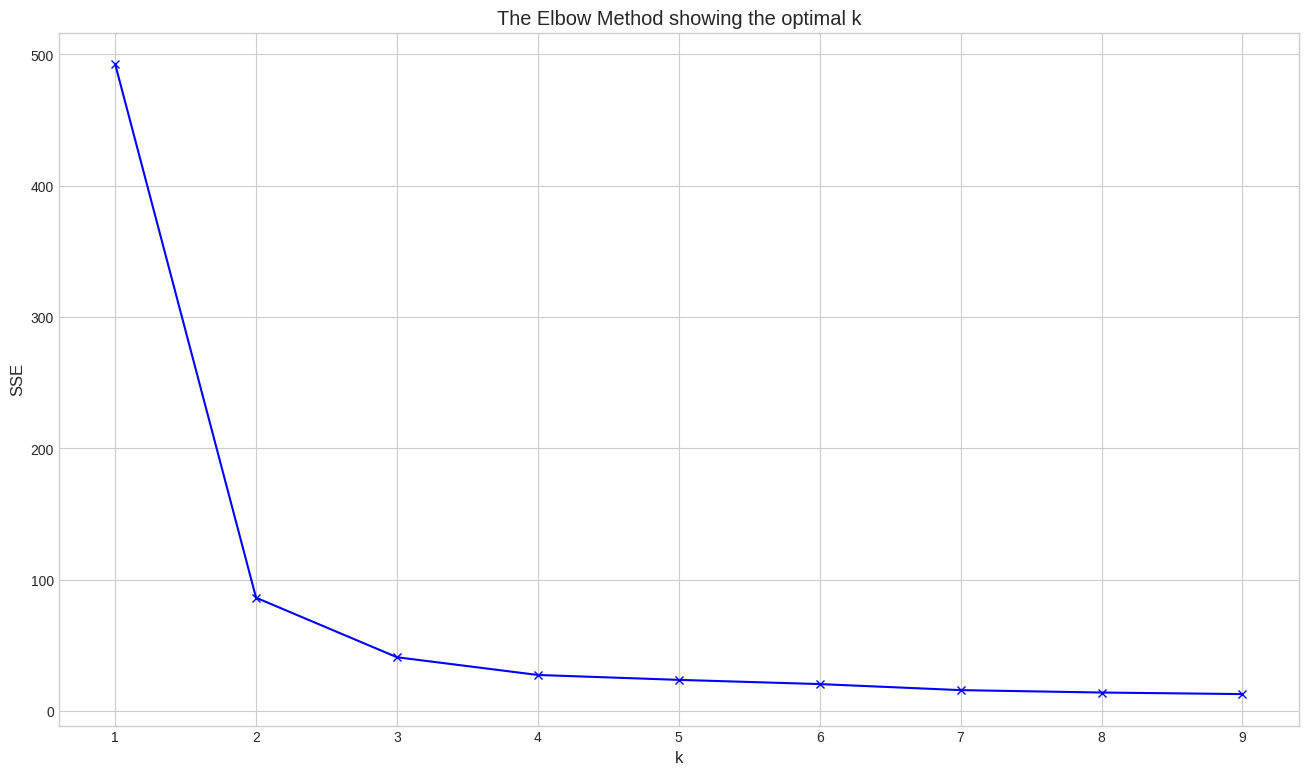

In [148]:
# Plot the elbow
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Penjelasan :


---

Di atas digunakan untuk menampilkan grafik yang menggambarkan hubungan antara jumlah kluster (K) dan nilai SSE (Inertia) dengan metode Elbow. Dengan plt.plot(), grafik dibuat untuk menunjukkan bagaimana SSE berubah seiring dengan jumlah kluster, dengan titik data yang ditandai menggunakan simbol 'x' berwarna biru. Grafik ini membantu mencari jumlah kluster yang optimal, yang biasanya terlihat pada titik "elbow", di mana penurunan SSE mulai melambat.

---


#IV. Plot Hasil Cluster dengan Nilai K yang Dipilih dengan Scatterplot

#A. Menentukan Nilai K Berdasar Elbow Graph Tersebut

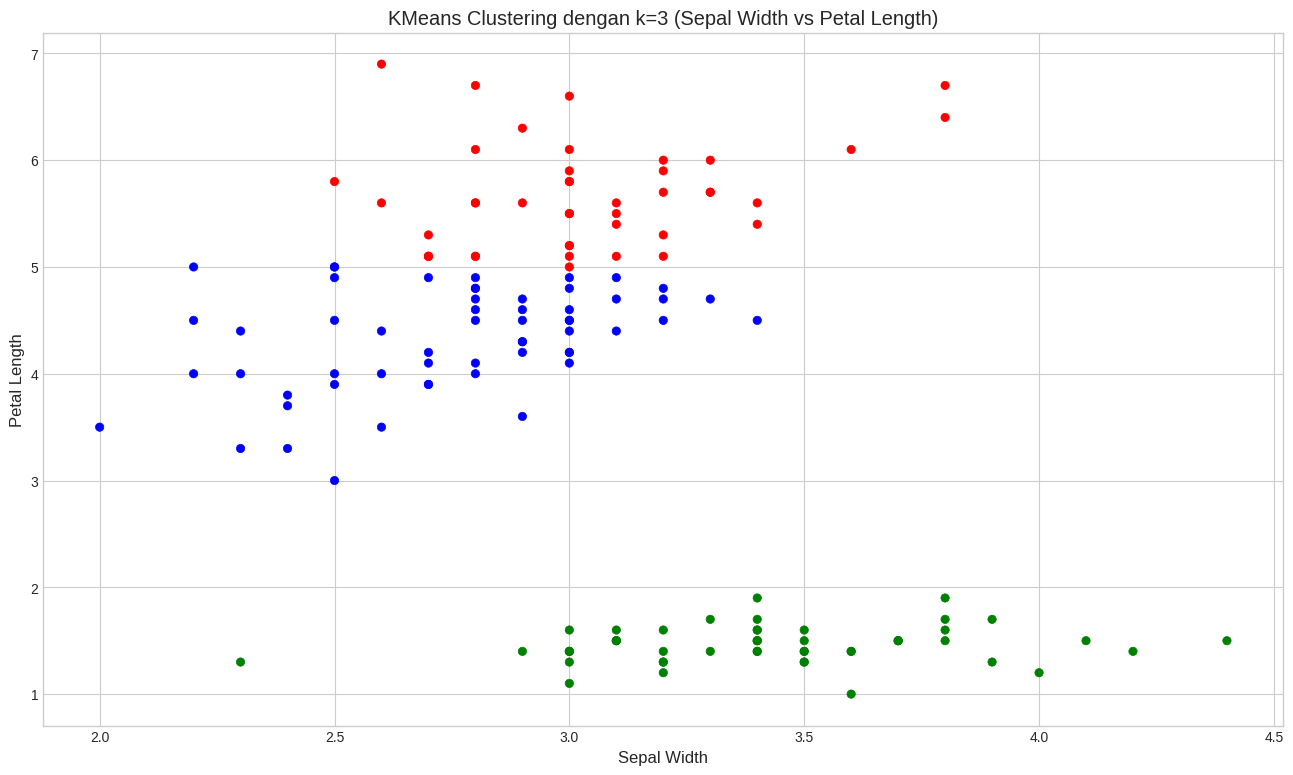

In [149]:
# KMeans Clustering dengan k=3

y_pred = KMeans(n_clusters=3).fit_predict(X)

LABEL_COLOR_MAP = {
    0: 'r',
    1: 'g',
    2: 'b'
}

label_color = [LABEL_COLOR_MAP[l] for l in y_pred]
plt.scatter(X[:, 0], X[:, 1], c=label_color)
plt.title("KMeans Clustering dengan k=3 (Sepal Width vs Petal Length)")
plt.xlabel("Sepal Width")
plt.ylabel("Petal Length")
plt.show()

Penjelasan :


---

Kode di atas melakukan klustering KMeans pada data dengan jumlah kluster 3. Hasil klustering disimpan dalam y_pred, yang berisi label untuk setiap titik data. Kemudian, library LABEL_COLOR_MAP digunakan untuk memberikan warna berbeda untuk setiap kluster merah, hijau, dan biru. Warna yang sesuai dengan label kluster dimasukkan ke dalam label_color. Grafik sebar dibuat dengan plt.scatter(), menampilkan data dengan warna yang mewakili klusternya.

---


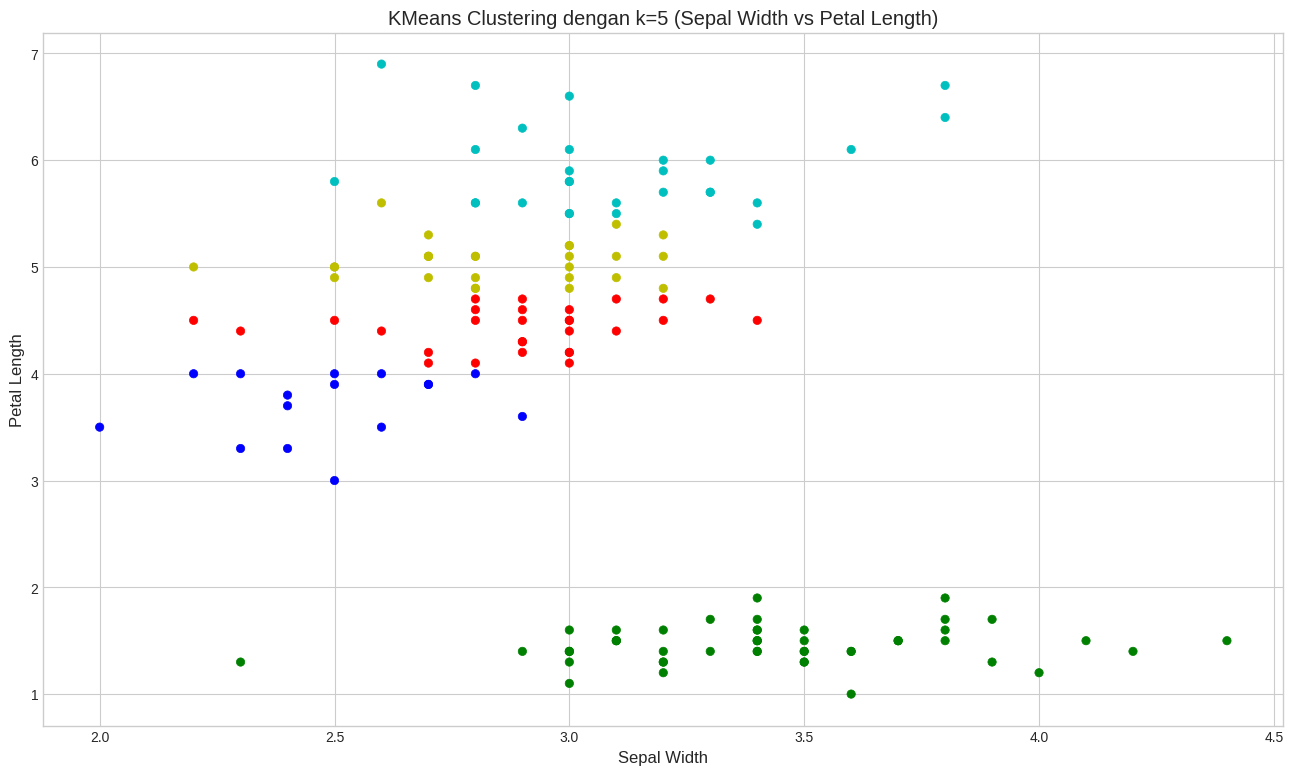

In [150]:
#KMeans Clustering dengan k=5

y_pred = KMeans(n_clusters=5, random_state=42).fit_predict(X)

# Menggunakan 5 warna berbeda untuk 5 cluster
LABEL_COLOR_MAP = {
    0: 'r',  # merah
    1: 'g',  # hijau
    2: 'b',  # biru
    3: 'y',  # kuning
    4: 'c'   # cyan
}

label_color = [LABEL_COLOR_MAP[l] for l in y_pred]
plt.scatter(X[:, 0], X[:, 1], c=label_color)
plt.title("KMeans Clustering dengan k=5 (Sepal Width vs Petal Length)")
plt.xlabel("Sepal Width")
plt.ylabel("Petal Length")
plt.show()


Penjelasan :


---

Kode di atas sama saja seperti sebelumnya yaitu melakukan klustering KMeans namun kali ini saya mencoba dengan 5 kluster, dan setiap kluster diberi warna berbeda yaitu merah, hijau, biru, kuning, dan cyan menggunakan LABEL_COLOR_MAP. Setelah itu, grafik sebar dibuat untuk menampilkan data dengan warna sesuai klusternya

---


#B. Menampilkan Hasil Clustering KMeans dengan Jumlah Cluster yang Berbeda-beda (k=1 hingga k=6)

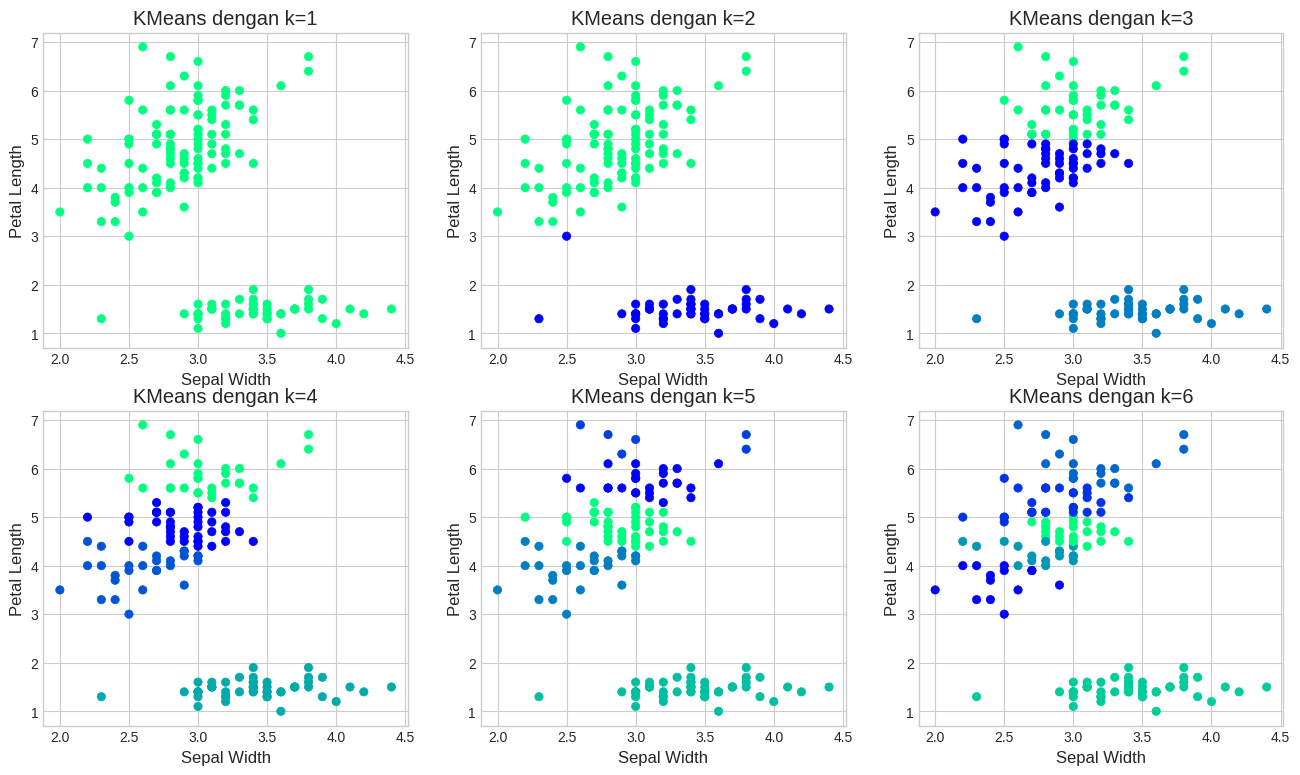

In [157]:
figure, ax = plt.subplots(2, 3)
K = range(1, 7)

for k in K:
    if k < 4:
        row = 0
        column = k - 1
    else:
        row = 1
        column = k - 4

    kmeanModel = KMeans(n_clusters=k).fit(X)
    y_pred = kmeanModel.fit_predict(X)
    ax[row][column].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='winter_r')
    ax[row][column].set_title(f'KMeans dengan k={k}')
    ax[row][column].set_xlabel('Sepal Width')
    ax[row][column].set_ylabel('Petal Length')

plt.show()

Penjelasan :


---

Kode di atas membuat grid 2x3 untuk menampilkan hasil klustering KMeans dengan jumlah kluster yang bervariasi dari 1 hingga 6. Untuk setiap nilai K, model KMeans dilatih dan diprediksi untuk data X, lalu hasil klustering ditampilkan dalam setiap subplot menggunakan scatter() dengan warna berdasarkan kluster. Setiap subplot diberi judul sesuai dengan jumlah kluster dan label pada sumbu X dan Y. Posisi subplot diatur sehingga kluster dengan K lebih kecil dari 4 ditampilkan di baris pertama, lalu yang lebih besar atau sama dengan 4 ditampilkan di baris kedua.

---
